# This file contains all the necessary EDA done on dataset which will be further used for model training and overall project

**About project** <br>
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

**About Dataset**
<br>
The dataset has been collected from Kaggle
<br>
<a>https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977</a>
<br>
The dataset consists of 8 columns and 1000 rows

In [1]:
# Mount Google Drive (for Colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/stud.csv')

Let's understand the basic structure and features of our dataset

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#  this shows that dataset has no null values
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [11]:
# this shows that dataset has no null values
df.duplicated().sum()

np.int64(0)

In [12]:
# lets see the number of unique entries that each column has
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [13]:
print("Categories in gender column:     ", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity column:     ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education column:     ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch column:     ", end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course column:     ", end=" ")
print(df['test_preparation_course'].unique())

Categories in gender column:      ['female' 'male']
Categories in race_ethnicity column:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education column:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch column:      ['standard' 'free/reduced']
Categories in test_preparation_course column:      ['none' 'completed']


Let's create two columns
One will be the total score scored by student
Other will be the average score of student

In [14]:
df['total_score'] = df['math_score'] + df['writing_score'] + df['reading_score']

df['average_score'] = df['total_score'] / 3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Now, let's look at number of students who scored a perfect score in atleast one subejct and number of students who scored less than 20 in atleast one subejct

In [21]:
print("Total number of students who got full marks in Math: ", df[df['math_score'] == 100]['average_score'].count())

print("Total number of students who got full marks in Reading: ", df[df['reading_score'] == 100]['average_score'].count())

print("Total number of students who got full marks in Writing: ", df[df['writing_score'] == 100]['average_score'].count())

Total number of students who got full marks in Math:  7
Total number of students who got full marks in Reading:  17
Total number of students who got full marks in Writing:  14


In [22]:
print("Total number of students who got less than 20 in Math: ", df[df['math_score'] < 20]['average_score'].count())

print("Total number of students who got less than 20 in Reading: ", df[df['reading_score'] < 20]['average_score'].count())

print("Total number of students who got less than 20 in Writing: ", df[df['writing_score'] < 20]['average_score'].count())

Total number of students who got less than 20 in Math:  4
Total number of students who got less than 20 in Reading:  1
Total number of students who got less than 20 in Writing:  3


**Now Let's Visualize average score distribution to make some conclusion.**

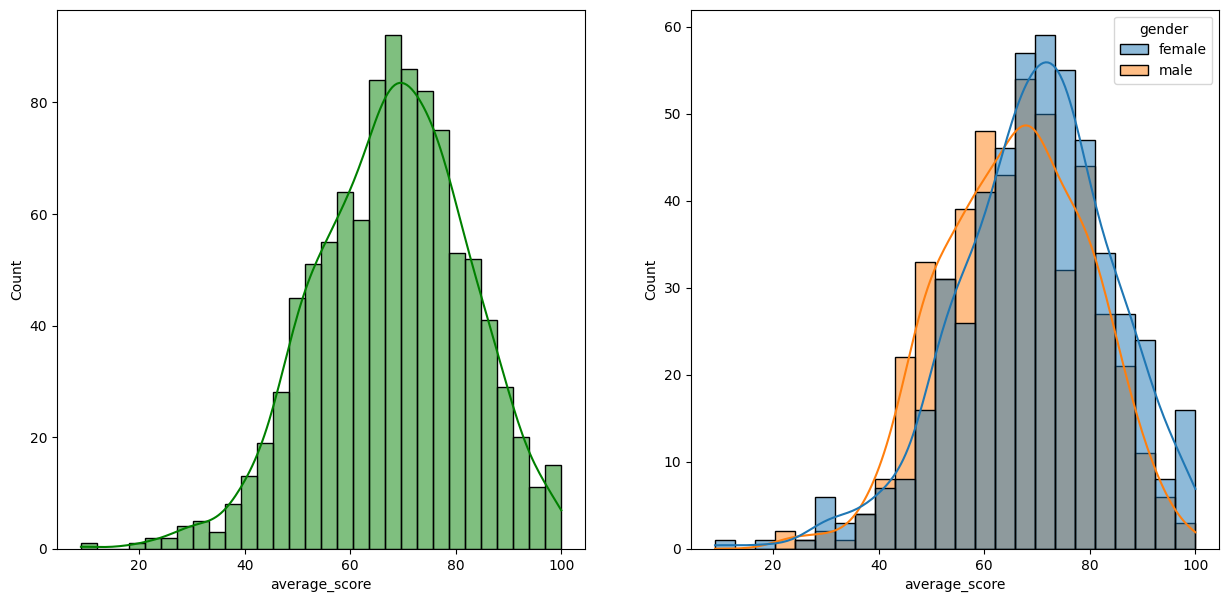

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

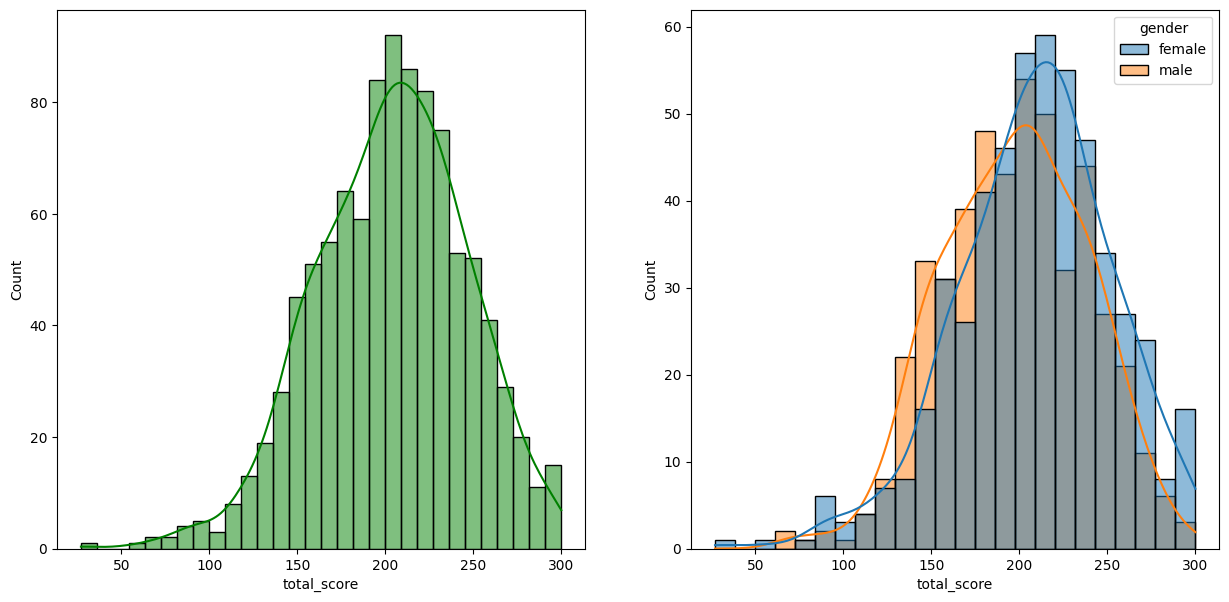

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

*Above graphs shows that femal students tend to score more than male students*

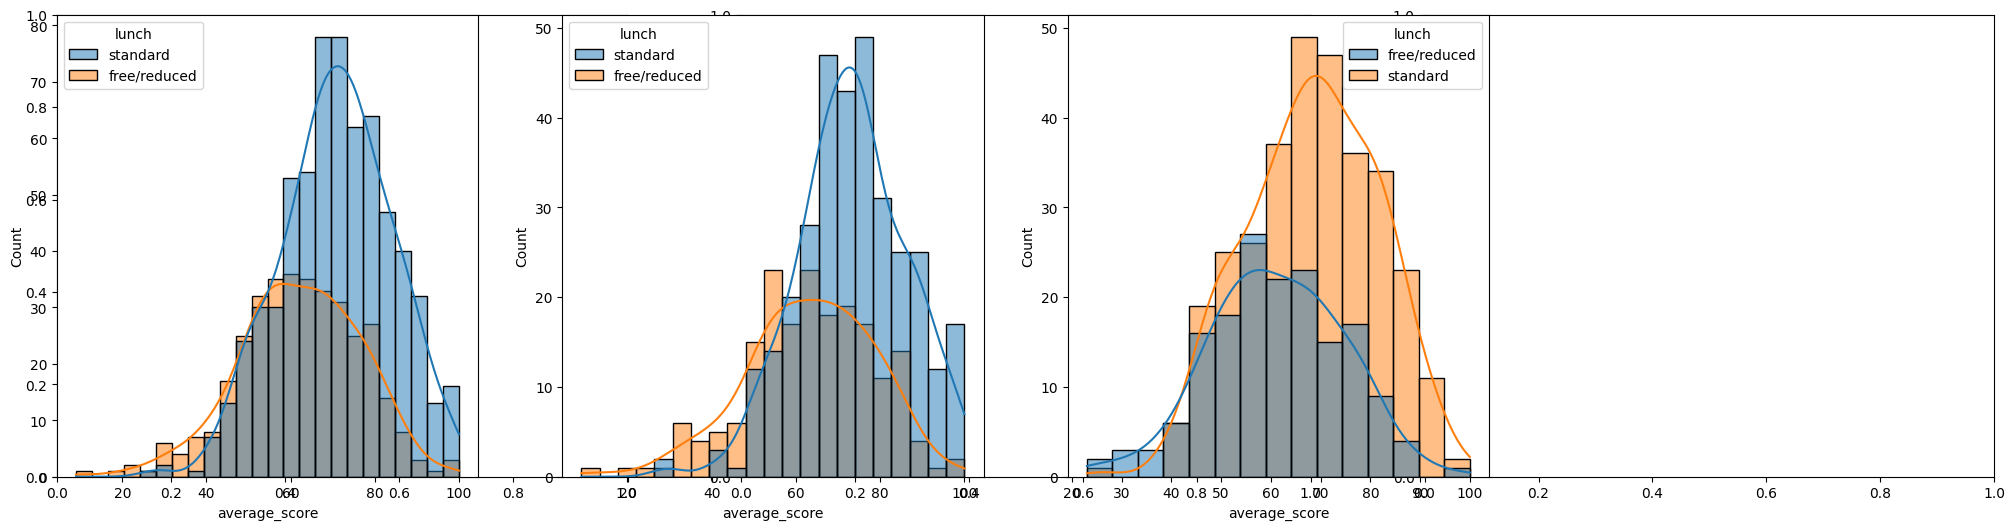

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

*Above graph shows that standard lunch helps students to score better irrespective of their gender*

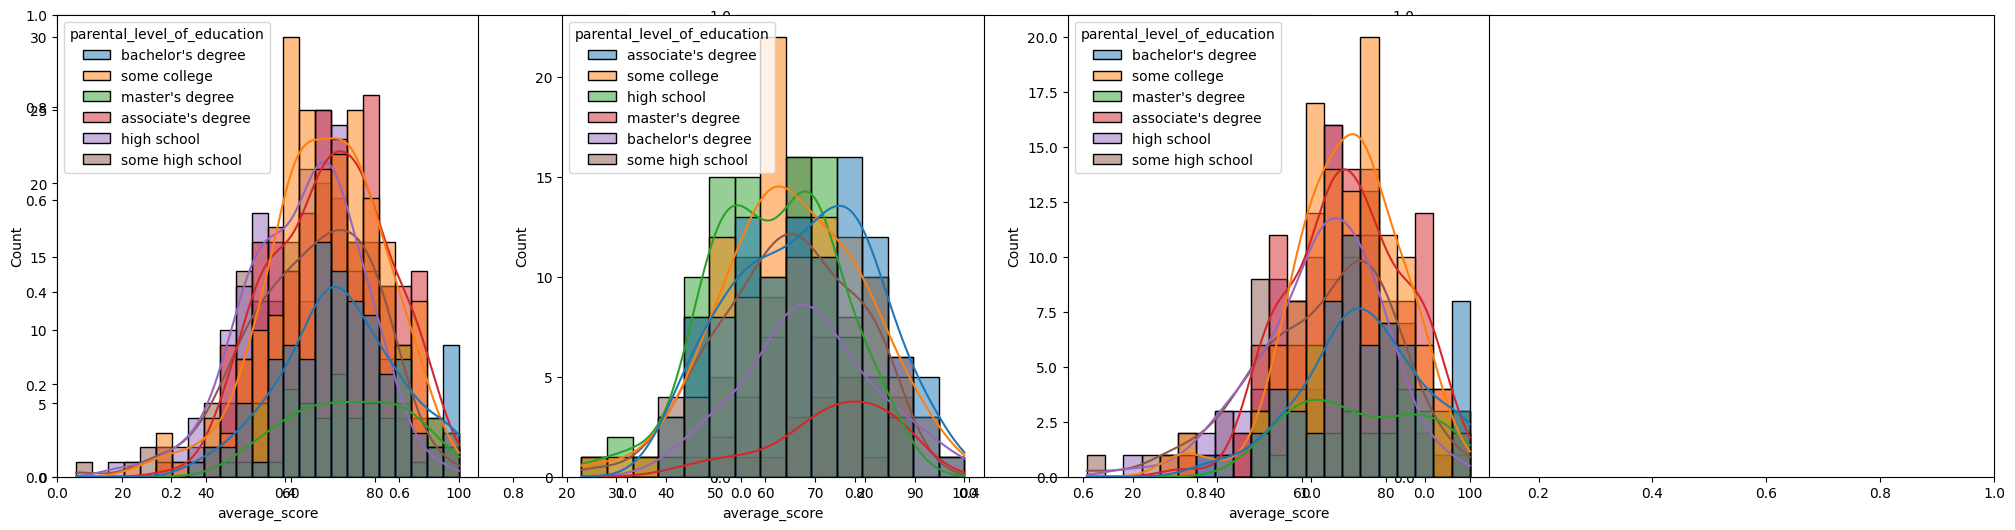

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

*In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students*

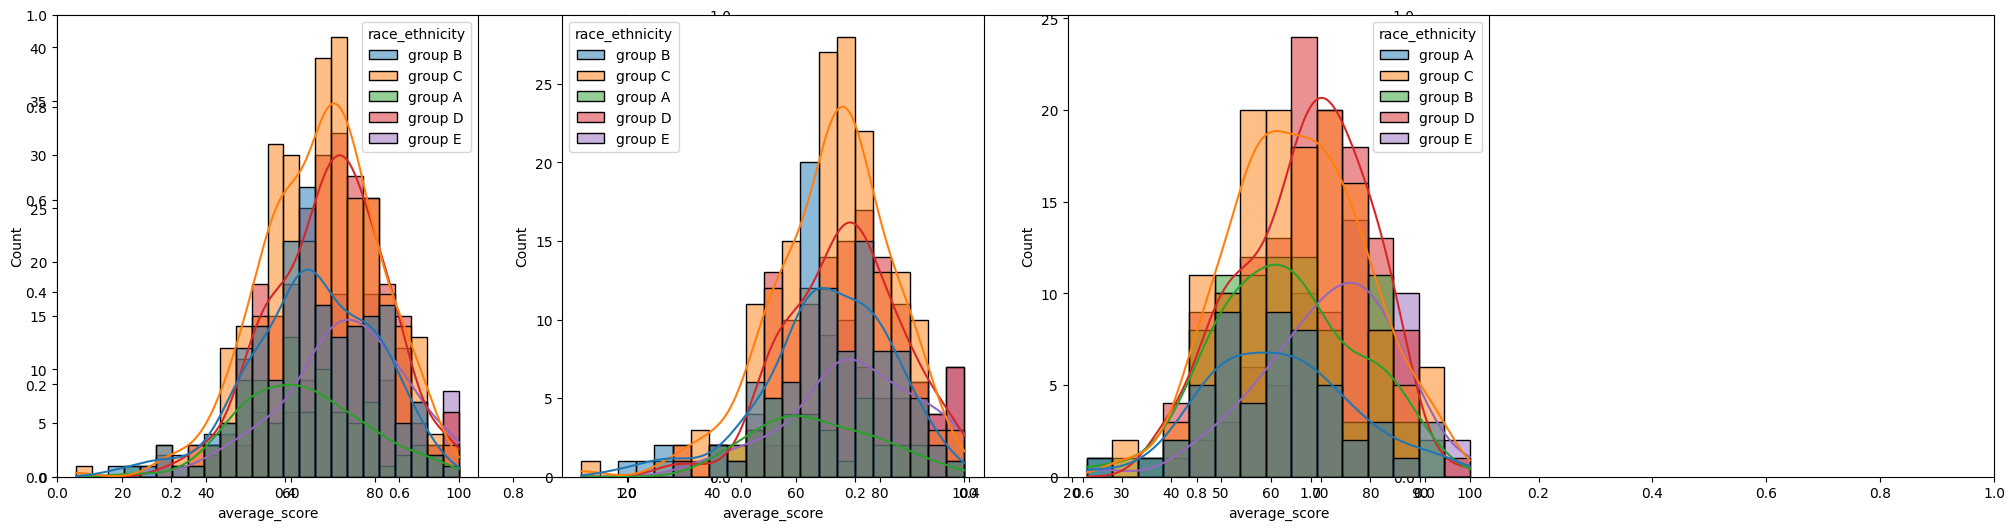

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

How is distribution of Gender ?

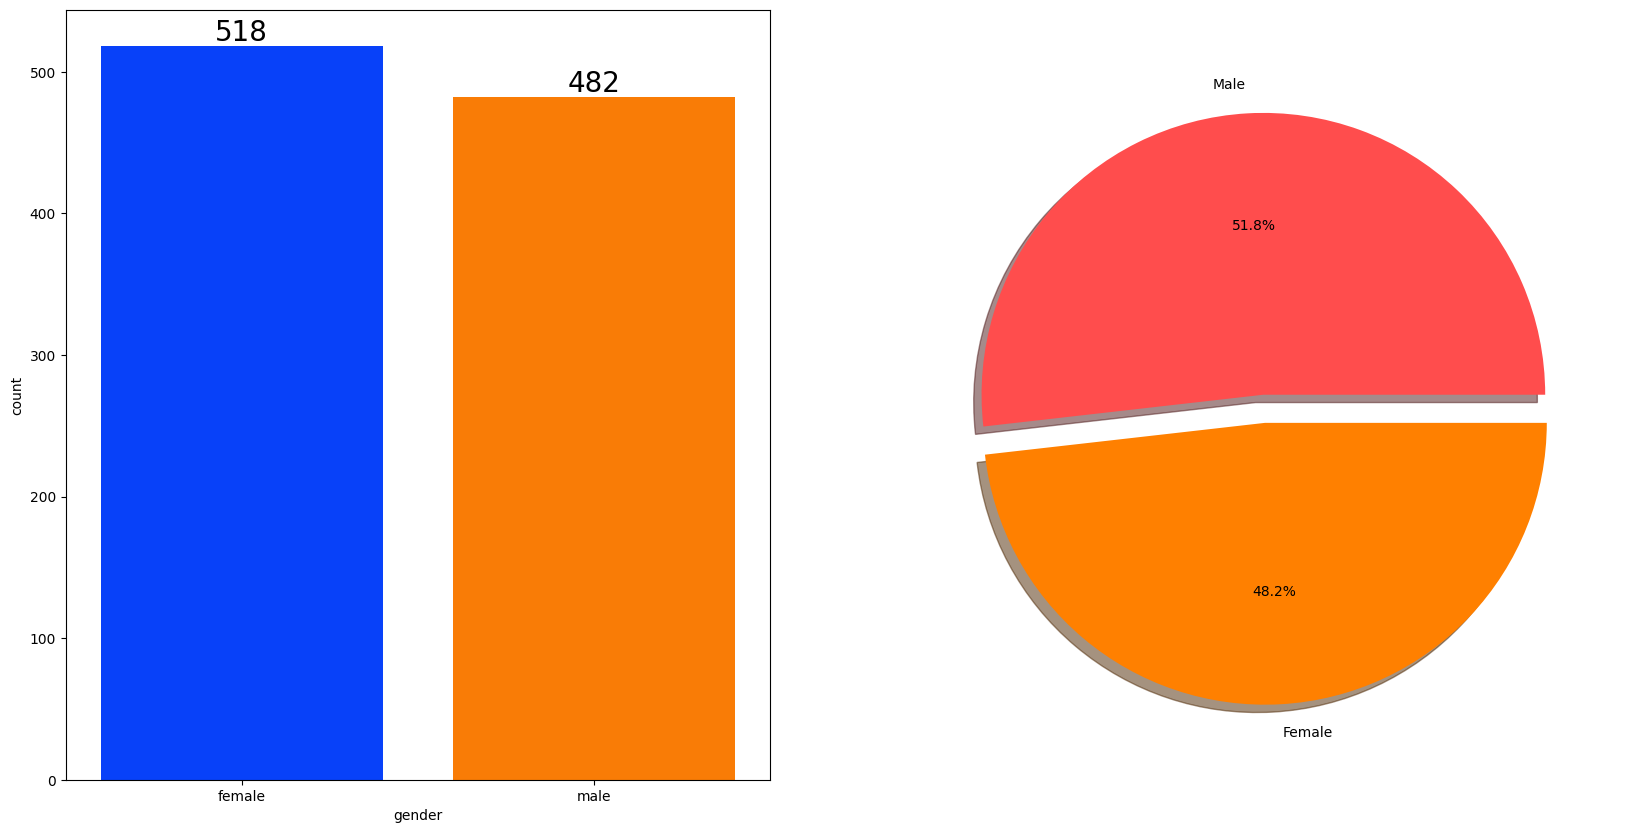

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Is gender has any impact on student's performance ?

In [37]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].mean()

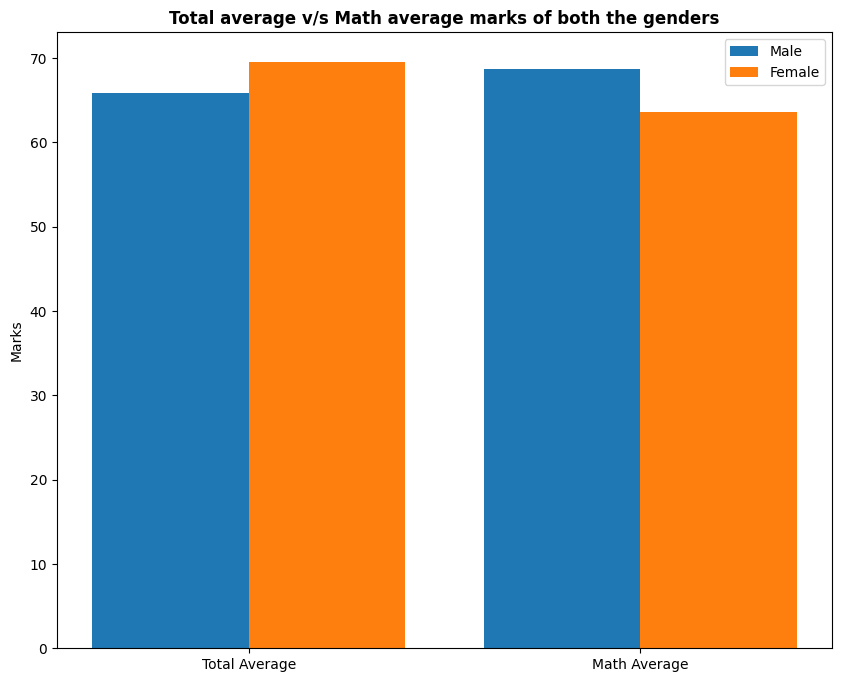

In [41]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

 Is Race/Ehnicity has any impact on student's performance ?

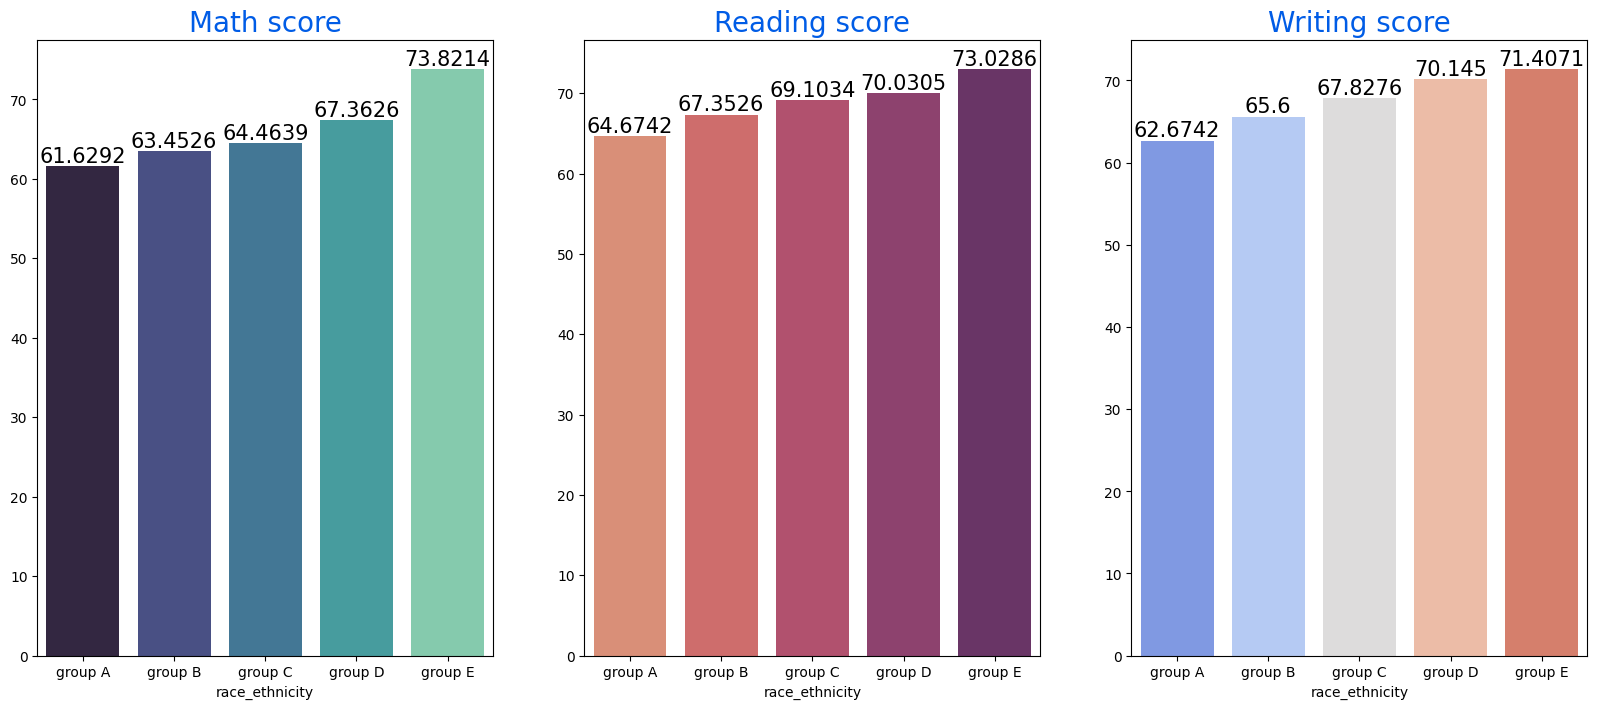

In [42]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

What is educational background of student's parent ?

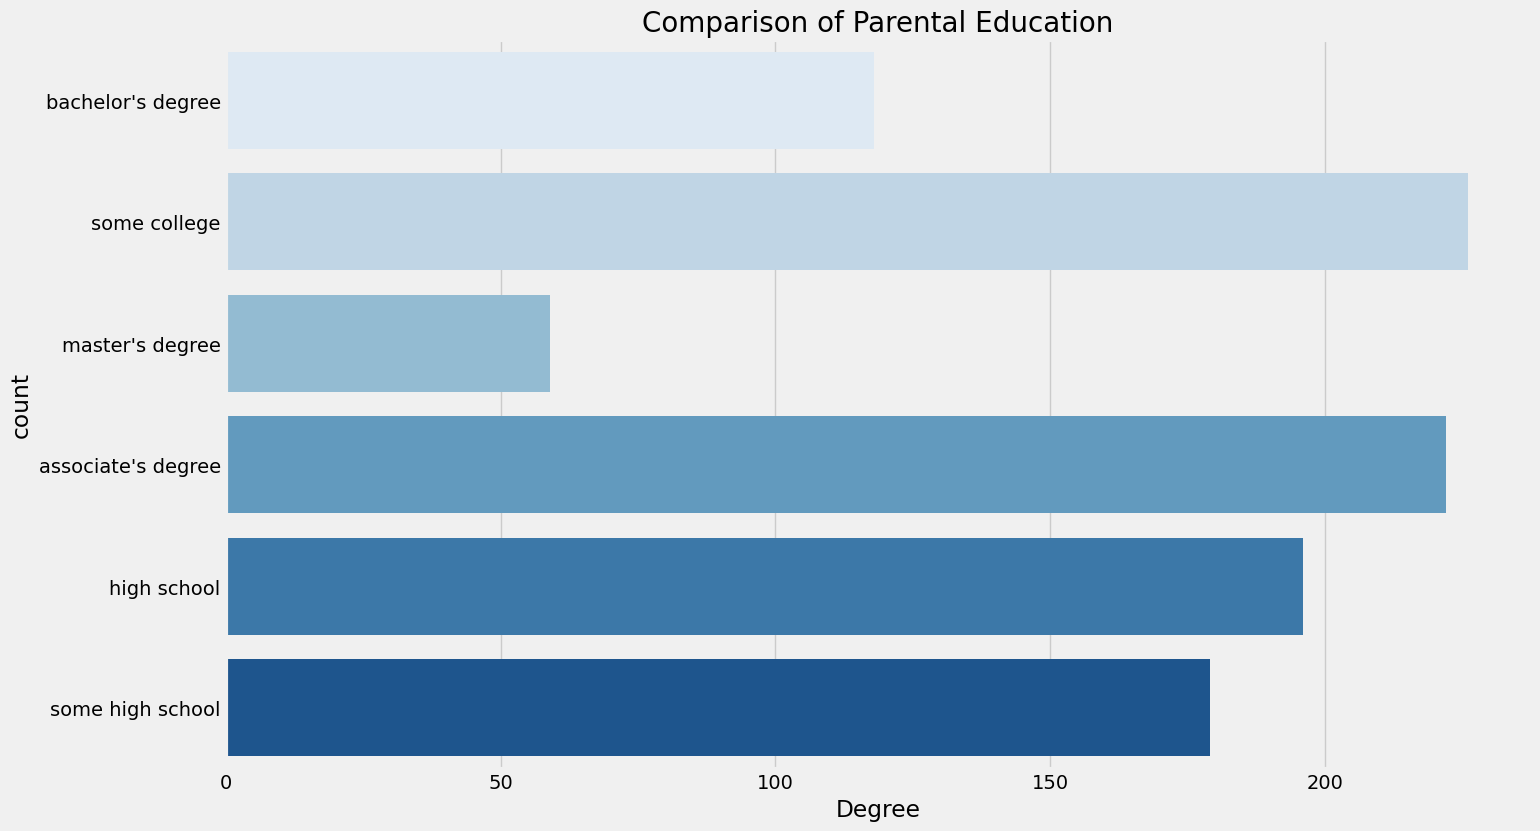

In [43]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Is parental education has any impact on student's performance ?

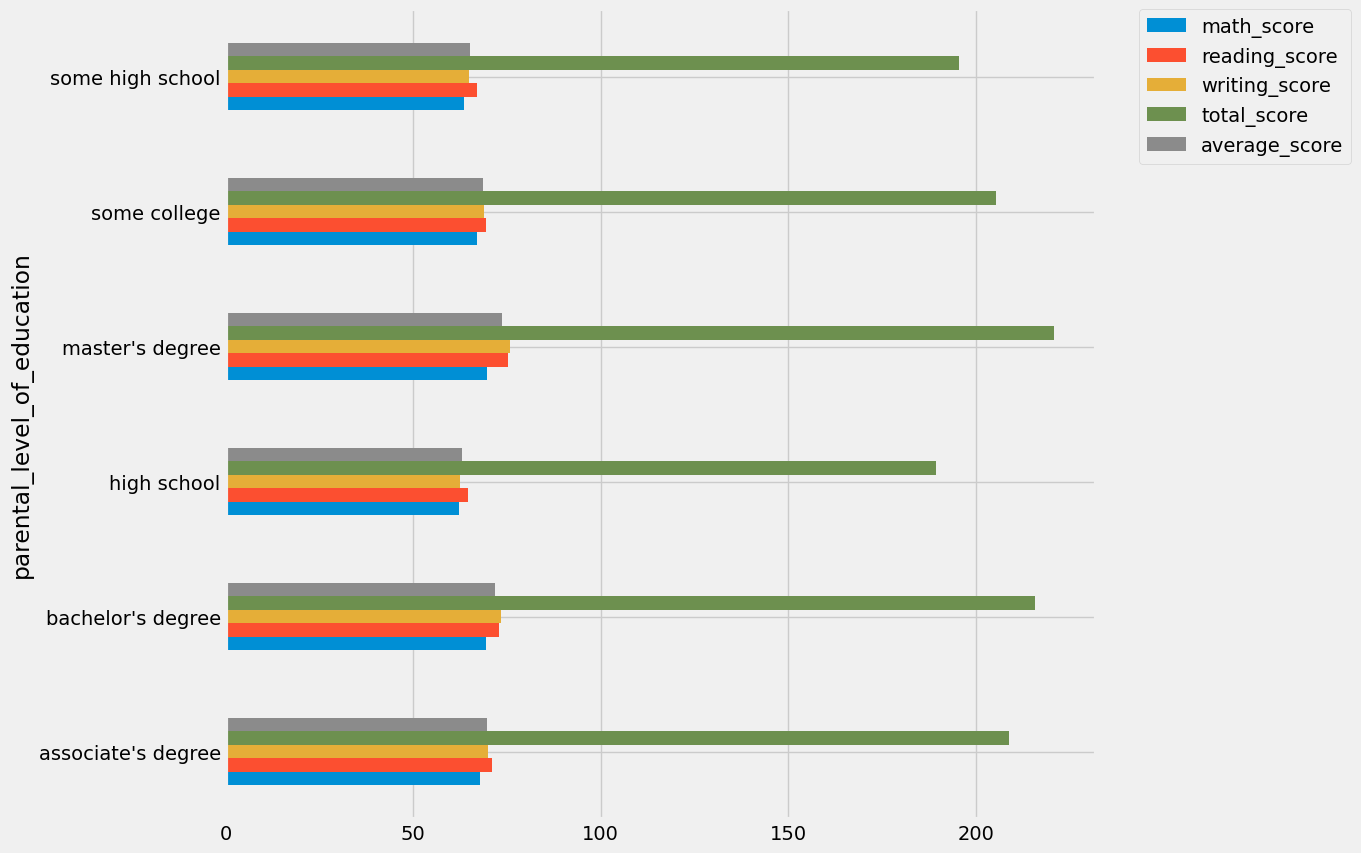

In [45]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()